# Observations and Insights

1. It appears the study tried to evenly distribute the number of mice per drug regimen. All except Stelasyn had 25 while Stelasyn had 24.
2. There is a fairly even split between female and male mice.
3. Ramicane and Capomulin are the most promising treatments. Ramicane's final tumor volume mean is smaller, its min and max are smaller, and its standard deviation and SEM are also smaller than any other drug regimen making it the most consistent. Capomulin trails Ramicane while others are more distant.

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [93]:
mouse_metadata.groupby("Drug Regimen").count()

,Mouse ID,Sex,Age_months,Weight (g)
Drug Regimen,,,,
Capomulin,25,25,25,25
Ceftamin,25,25,25,25
Infubinol,25,25,25,25
Ketapril,25,25,25,25
Naftisol,25,25,25,25
Placebo,25,25,25,25
Propriva,25,25,25,25
Ramicane,25,25,25,25
Stelasyn,24,24,24,24


In [94]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [95]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [96]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [97]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [98]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

In [99]:
# Display the data table for preview
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [100]:
# Checking the number of mice.
combined_df["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df=combined_df.drop_duplicates(['Mouse ID', 'Timepoint'])

In [103]:
# Checking the number of mice in the clean DataFrame.
combined_df["Mouse ID"].describe()

count     1888
unique     249
top       a401
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen=combined_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean=grouped_regimen['Tumor Volume (mm3)'].mean()
tumor_volume_median=grouped_regimen['Tumor Volume (mm3)'].median()
tumor_volume_variance=grouped_regimen['Tumor Volume (mm3)'].var()
tumor_volume_std=grouped_regimen['Tumor Volume (mm3)'].std()
tumor_volume_sem=grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
grouped_regimen_df=pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean,
                     "Tumor Volume Median": tumor_volume_median,
                     "Tumor Volume Variance": tumor_volume_variance,
                     "Tumor Volume Standard Deviation": tumor_volume_std,
                     "Tumor Volume SEM": tumor_volume_sem})
grouped_regimen_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen_df2=combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['count','min','max','mean','median','var','std','sem']})
grouped_regimen_df2

Tumor Volume (mm3)                                              \
                          count        min        max       mean     median   
Drug Regimen                                                                  
Capomulin                   230  23.343598  48.158209  40.675741  41.557809   
Ceftamin                    178  45.000000  68.923185  52.591172  51.776157   
Infubinol                   178  36.321346  72.226731  52.884795  51.820584   
Ketapril                    188  45.000000  78.567014  55.235638  53.698743   
Naftisol                    186  45.000000  76.668817  54.331565  52.509285   
Placebo                     181  45.000000  73.212939  54.033581  52.288934   
Propriva                    156  45.000000  72.455421  52.393463  50.909965   
Ramicane                    228  22.050126  47.622816  40.216745  40.673236   
Stelasyn                    181  45.000000  75.123690  54.233149  52.431737   
Zoniferol                   182  45.000000  73.324432  53.236507  51.818479   

                                             
                    var       std       sem  
Drug Regimen                                 
Capomulin     24.947764  4.994774  0.329346  
Ceftamin      39.290177  6.268188  0.469821  
Infubinol     43.128684  6.567243  0.492236  
Ketapril      68.553577  8.279709  0.603860  
Naftisol      66.173479  8.134708  0.596466  
Placebo       61.168083  7.821003  0.581331  
Propriva      43.138803  6.568014  0.525862  
Ramicane      23.486704  4.846308  0.320955  
Stelasyn      59.450562  7.710419  0.573111  
Zoniferol     48.533355  6.966589  0.516398

## Bar and Pie Charts

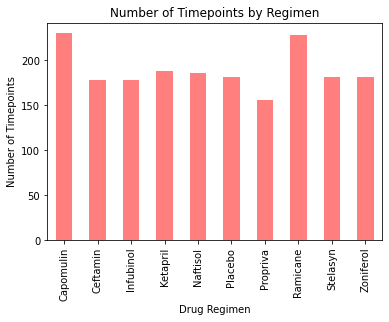

In [106]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug=combined_df.groupby('Drug Regimen')
timepoints=drug['Timepoint'].count()

count_chart=timepoints.plot(kind='bar', color='red', alpha=0.5)
count_chart.set_title("Number of Timepoints by Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Timepoints")

plt.show()

In [107]:
timepoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

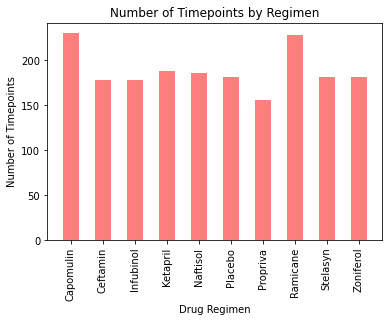

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]
tick_label=list(timepoints.keys())

plt.bar(x_axis, timepoints, tick_label=tick_label,color='r', alpha=0.5, width=.5, align="center")

plt.xticks(rotation=45)
plt.title("Number of Timepoints by Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Timepoints")

plt.show()

Text(0, 0.5, '')

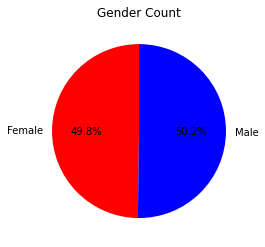

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=combined_df.groupby('Sex')['Mouse ID'].nunique()

gender_pie=gender_count.plot(kind='pie',startangle=90, colors=['red','blue'], autopct='%1.1f%%')
gender_pie.set_title("Gender Count")
gender_pie.set_ylabel("")

Text(0.5, 1.0, 'Gender Count')

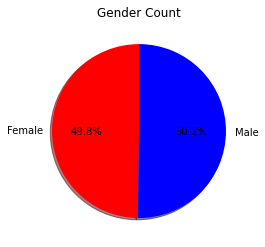

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data=gender_count.keys()
count_data=gender_count
colors = ["red", "blue"]
plt.pie(count_data, labels=gender_data, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Count")


## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df=combined_df.groupby("Mouse ID")["Timepoint"].max()
max_df.describe()

count    249.000000
mean      32.911647
std       15.465109
min        0.000000
25%       20.000000
50%       45.000000
75%       45.000000
max       45.000000
Name: Timepoint, dtype: float64

In [112]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(combined_df, max_df, on='Mouse ID')

#Getting only the rows that have the max timepoint
max_timepoint_df = max_timepoint_df[max_timepoint_df["Timepoint_x"]==max_timepoint_df["Timepoint_y"]]

max_timepoint_df.describe()

,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,12.730924,26.116466,32.911647,54.999137,1.682731,32.911647
std,7.228687,3.697003,15.465109,12.655080,1.325823,15.465109
min,1.000000,15.000000,0.000000,22.050126,0.000000,0.000000
25%,6.000000,25.000000,20.000000,45.934712,1.000000,20.000000
50%,13.000000,27.000000,45.000000,55.841410,1.000000,45.000000
75%,19.000000,29.000000,45.000000,64.957562,3.000000,45.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000,45.000000


In [113]:
max_timepoint_df.groupby("Drug Regimen")["Mouse ID"].count()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [114]:
# Filtering to the four treatments
max_timepoint_df = max_timepoint_df[(max_timepoint_df["Drug Regimen"]=="Capomulin" )|
                                    (max_timepoint_df["Drug Regimen"]=="Ramicane")|
                                    (max_timepoint_df["Drug Regimen"]=="Infubinol")|
                                    (max_timepoint_df["Drug Regimen"]=="Ceftamin")]
max_timepoint_df["Max Timepoint"]=max_timepoint_df["Timepoint_x"]
max_timepoint_df["Final Tumor Volume (mm3)"]=max_timepoint_df["Tumor Volume (mm3)"]
max_timepoint_df = max_timepoint_df[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Max Timepoint", 
                                  "Final Tumor Volume (mm3)", "Metastatic Sites"]]

#cleaned dataframe of final tumor volume of each mouse across four of the most promising treatment regimens
max_timepoint_df.describe()

,Age_months,Weight (g),Max Timepoint,Final Tumor Volume (mm3),Metastatic Sites
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,13.520000,23.710000,35.700000,47.197795,1.45000
std,7.608448,4.472802,14.442852,12.953884,1.14922
min,1.000000,15.000000,0.000000,22.050126,0.00000
25%,7.000000,20.000000,30.000000,37.187744,1.00000
50%,15.000000,25.000000,45.000000,45.000000,1.00000
75%,20.000000,27.250000,45.000000,59.930262,2.00000
max,24.000000,30.000000,45.000000,72.226731,4.00000


In [115]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=max_timepoint_df["Drug Regimen"].unique()
treatments=treatments.tolist()
treatments

['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

In [116]:
max_timepoint_df["Final Tumor Volume (mm3)"].describe()

count    100.000000
mean      47.197795
std       12.953884
min       22.050126
25%       37.187744
50%       45.000000
75%       59.930262
max       72.226731
Name: Final Tumor Volume (mm3), dtype: float64

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
The the mean of tumor volume is: 47.197795189499985 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


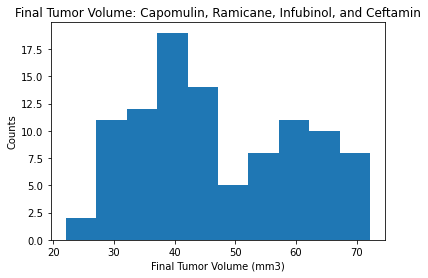

In [117]:
# Create empty list to fill with tumor vol data (for plotting)

volume = max_timepoint_df["Final Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=max_timepoint_df['Final Tumor Volume (mm3)'].mean()

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print(f"The the mean of tumor volume is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(max_timepoint_df['Final Tumor Volume (mm3)'])
plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.title('Final Tumor Volume: Capomulin, Ramicane, Infubinol, and Ceftamin')
plt.show()

In [118]:
lower_bound

3.0739668737499812

In [119]:
upper_bound

94.04403868375002

In [120]:
volume=max_timepoint_df["Final Tumor Volume (mm3)"].tolist()

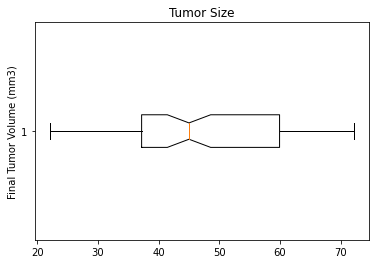

In [121]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volume, notch=True, vert=False, flierprops=green_diamond)
plt.show()
#no outliers show

In [122]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    
capomulin_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Capomulin"]
capomulin_volume=capomulin_df['Final Tumor Volume (mm3)']
ramicane_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Ramicane"]
ramicane_volume=ramicane_df['Final Tumor Volume (mm3)']
infubinol_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Infubinol"]
infubinol_volume=infubinol_df['Final Tumor Volume (mm3)']
ceftamin_df=max_timepoint_df[max_timepoint_df["Drug Regimen"]=="Ceftamin"]
ceftamin_volume=ceftamin_df['Final Tumor Volume (mm3)']

In [123]:
# Determine outliers using upper and lower bounds
quartiles1 = capomulin_volume.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
capomulin_outliers=capomulin_df[(capomulin_df["Final Tumor Volume (mm3)"]< lower_bound1) |
                                (capomulin_df["Final Tumor Volume (mm3)"]> upper_bound1)]
capomulin_outliers

20.70456164999999 - 51.83201549


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint,Final Tumor Volume (mm3),Metastatic Sites


In [124]:
quartiles2 = ramicane_volume.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"{lower_bound2} - {upper_bound2}")
ramicane_outliers=ramicane_df[(ramicane_df["Final Tumor Volume (mm3)"]< lower_bound2) |
                                (ramicane_df["Final Tumor Volume (mm3)"]> upper_bound2)]
ramicane_outliers

17.912664470000003 - 54.30681135


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint,Final Tumor Volume (mm3),Metastatic Sites


In [125]:
quartiles3 = infubinol_volume.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"{lower_bound3} - {upper_bound3}")
infubinol_outliers=infubinol_df[(infubinol_df["Final Tumor Volume (mm3)"]< lower_bound3) |
                                (infubinol_df["Final Tumor Volume (mm3)"]> upper_bound3)]
infubinol_outliers

36.83290494999999 - 82.74144559000001


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint,Final Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [126]:
quartiles4 = ceftamin_volume.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"{lower_bound4} - {upper_bound4}")
ceftamin_outliers=ceftamin_df[(ceftamin_df["Final Tumor Volume (mm3)"]< lower_bound4) |
                                (ceftamin_df["Final Tumor Volume (mm3)"]> upper_bound4)]
ceftamin_outliers

25.355449580000002 - 87.66645829999999


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint,Final Tumor Volume (mm3),Metastatic Sites


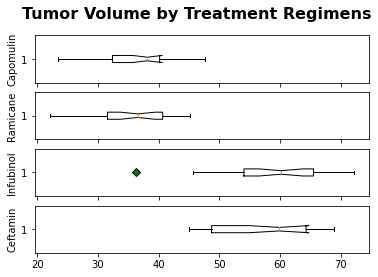

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4,sharex=True)
fig1.suptitle("Tumor Volume by Treatment Regimens",fontsize=16,fontweight="bold")


ax1.boxplot(capomulin_volume, notch=True, vert=False, flierprops=green_diamond)
ax1.set_ylabel("Capomulin")
ax2.boxplot(ramicane_volume, notch=True, vert=False, flierprops=green_diamond)
ax2.set_ylabel("Ramicane")
ax3.boxplot(infubinol_volume, notch=True, vert=False, flierprops=green_diamond)
ax3.set_ylabel("Infubinol")
ax4.boxplot(ceftamin_volume, notch=True, vert=False, flierprops=green_diamond)
ax4.set_ylabel("Ceftamin")
plt.show()

## Line and Scatter Plots

In [128]:
capomulin_timepoints_df=combined_df[combined_df["Drug Regimen"]=="Capomulin"]
s185_timepoints_df=capomulin_timepoints_df[capomulin_timepoints_df["Mouse ID"]=="s185"]
s185_timepoints_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


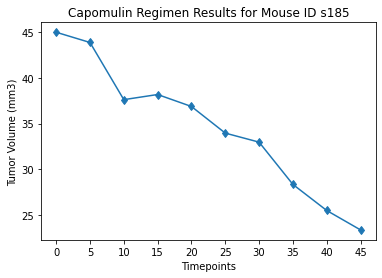

In [129]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis_data=s185_timepoints_df["Timepoint"]
tumor_volume=s185_timepoints_df["Tumor Volume (mm3)"]
tick_locations=[value for value in x_axis_data]
plt.plot(x_axis_data, tumor_volume, marker='d')
plt.title("Capomulin Regimen Results for Mouse ID s185")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(tick_locations)
plt.show()

In [130]:
capomulin_regimen=combined_df[combined_df["Drug Regimen"]=="Capomulin"]
capomulin_regimen["Average Tumor Volume"]=capomulin_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].transform('mean')
average_tumor_df=capomulin_regimen[["Mouse ID", "Weight (g)", "Average Tumor Volume"]]
average_tumor_df=average_tumor_df.drop_duplicates(['Mouse ID', 'Weight (g)', 'Average Tumor Volume'])
average_tumor_df

C:\Users\Samantha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mouse ID,Weight (g),Average Tumor Volume
10,s185,17,34.559143
20,x401,15,36.182040
30,m601,17,34.847470
60,f966,17,36.505973
95,u364,17,39.887495
115,y793,17,38.506829
125,r554,17,36.509212
135,m957,19,39.049816
155,t565,17,39.328725
195,i738,20,39.141053


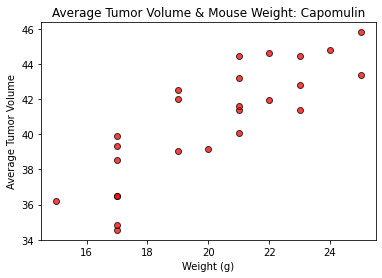

In [131]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_tumor_volume=average_tumor_df["Average Tumor Volume"]
weight=average_tumor_df["Weight (g)"]
plt.scatter(weight, average_tumor_volume, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Average Tumor Volume & Mouse Weight: Capomulin")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between tumor volume and weight is {round(st.pearsonr(weight, average_tumor_volume,)[0],2)}")

The correlation coefficient between tumor volume and weight is 0.84


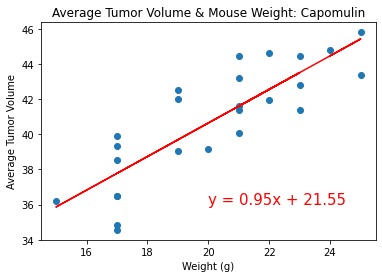

In [133]:
weight=average_tumor_df["Weight (g)"]
average_tumor_volume=average_tumor_df["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, average_tumor_volume)
plt.plot(weight, regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color='red')
plt.title("Average Tumor Volume & Mouse Weight: Capomulin")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.show()